<a href="https://colab.research.google.com/github/jamesgeziqian/DS-4440-Homework-F20/blob/master/DS4440_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DS4440: Homework 1

This homework covers gradient descent, and logistic regression for (binary) classification, and PyTorch.

You are allowed to upload a *single* notebook file (modifying this starter notebook) to Piazza that contains answers to all problems, including the written ones (for which you much use [LaTeX](https://www.overleaf.com/learn/latex/Free_online_introduction_to_LaTeX_(part_1))).



Your name: Ziqian Ge

## Q1: Deriving the Gradient (*35 points*)

Assume we want to perform binary classification, i.e., $y_i \in \{0,1\}$.
In logistic regression, we posit the following model (parameterized by ${\bf w}$): 

> $p(y_i=1|{\bf x}_i, {\bf w}) = \sigma({\bf w} \cdot {\bf x}_i)$

Where $\sigma$ is the sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$. 



The log-likelihood for this model is:

> $LL({\bf w}| {\bf x}, {\bf y}) = \sum_i y_i {\text {ln}}\{p(y_i|{\bf x}_i, {\bf w})\} + (1 - y_i) {\text{ln}}\{1 - p(y_i|{\bf x}_i, {\bf w})\}$



Formulate this as a **minimization** problem for gradient descent, and derive the gradient with respect to the parameters ${\bf w}$. **Show your steps**.





### Q1 Answer

$LL(w|x, y) = \sum_i y_i \ln\{\frac{1}{1 + e^{-w\cdot x_i}}\} + (1- y_i)\ln\{1 - \frac{1}{1 + e^{-w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{1}{1 + e^{-w\cdot x_i}}\} + (1 - y_i)\ln\{\frac{e^{-w\cdot x_i}}{1 + e^{-w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{1}{1 + e^{-w\cdot x_i}}\} + (1 - y_i)\ln\{\frac{e^{-w\cdot x_i}\cdot e^{w\cdot x_i}}{e^{w\cdot x_i} + e^{-w\cdot x_i} \cdot e^{w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{1}{1 + e^{-w\cdot x_i}}\} + (1 - y_i)\ln\{\frac{1}{e^{w\cdot x_i} + 1}\}$

$ = \sum_i y_i \ln\{\frac{1}{1 + e^{-w\cdot x_i}}\} + \ln\{\frac{1}{e^{w\cdot x_i} + 1}\} - y_i \ln\{\frac{1}{e^{w\cdot x_i} + 1}\}$

$ = \sum_i y_i (\ln\{\frac{1}{1 + e^{-w\cdot x_i}}\} - \ln\{\frac{1}{1 + e^{w\cdot x_i}}\}) + \ln\{\frac{1}{1 + e^{w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{1 + e^{w\cdot x_i}}{1 + e^{-w\cdot x_i}}\} + \ln\{1\} - \ln\{{1 + e^{w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{(1 + e^{w\cdot x_i})\cdot e^{w\cdot x_i}}{(1 + e^{-w\cdot x_i})\cdot e^{w\cdot x_i}}\} - \ln\{{1 + e^{w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{(1 + e^{w\cdot x_i})\cdot e^{w\cdot x_i}}{e^{w\cdot x_i} + e^{-w\cdot x_i}\cdot e^{w\cdot x_i}}\} - \ln\{{1 + e^{w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{\frac{(1 + e^{w\cdot x_i})\cdot e^{w\cdot x_i}}{e^{w\cdot x_i} + 1}\} - \ln\{{1 + e^{w\cdot x_i}}\}$

$ = \sum_i y_i \ln\{e^{w\cdot x_i}\} - \ln\{{1 + e^{w\cdot x_i}}\}$

$ = \sum_i y_i \cdot w\cdot x_i - \ln\{{1 + e^{w\cdot x_i}}\}$

$\frac{\partial}{\partial w} LL(w|x, y) = \frac{\partial}{\partial w} \sum_i y_i \cdot w\cdot x_i - \ln\{1 + e^{w\cdot x_i}\}$

$ = \sum_i y_i \cdot x_i - \frac{x_i \cdot e^{w \cdot x_i}}{1 + e^{w\cdot x_i}}$

$ = \sum_i (y_i - \frac{e^{w \cdot x_i}}{1 + e^{w\cdot x_i}})\cdot x_i$

$ = \sum_i (y_i - \frac{e^{w \cdot x_i} \cdot e^{-w \cdot x_i}}{(1 + e^{w\cdot x_i})\cdot e^{-w \cdot x_i}})\cdot x_i$

$ = \sum_i (y_i - \frac{1}{e^{-w\cdot x_i} + 1})\cdot x_i$

$ = \sum_i (y_i - \sigma(w\cdot x_i))\cdot x_i$

# Logistic Regression: 3-ways!

In this section you will implement logistic regression in two different ways.
For each, fit to the simple Iris data; you can get the `X`, `y` values via the provided helper function.
Do not include bias (`intercept') terms. 

For each version of LR below, divvy your data into a validation set (we'll say 10% of the iris X, y), and a training set (the rest)
Compute a validation loss each epoch, and retain these
Make plots of your validation losses (a helper function is provided).
Print your model weights.
Don't forget to rerun everything when you have finished!

#### Shared imports and helper functions

In [ ]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

def get_iris_X_y(shuffle_instances=True):
  '''
  The Iris dataset is a famous dataset comprising flower characteristics.
  We'll recast as a binary classification task.
  '''
  iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   header=None)
  y = iris_df.iloc[0:100, 4].values 
  y = np.where(y == 'Iris-setosa', -1, 1)
  y[y<0] = 0 # convert to 1/0 labels
  X = iris_df.iloc[0:100, [0, 2]].values
  if shuffle_instances:
    X, y = shuffle(X, y, random_state=0)
  return X, y


def sigmoid(x):
  ''' a useful helper function. '''
  return 1/(1+np.exp(-x))

### Q2. Pure `numpy` implementation (*35 points*)

In [ ]:
def gd_func_gradient(x, y, w):
  """
  Parameters
  x: (n x d) matrix comprising n instances with d dimensions/features
  y: (n x 1) vector comprising labels (0/1)
  w: (d x 1) weight factor

  Return
  ---
  np.ndarray (d x 1)
  """
  return np.matmul(x.T, y - sigmoid(np.matmul(x, w)))


def validate_result(theta, x, y):
  expected_y = sigmoid(np.matmul(x, theta))
  return log_loss(y_true=y, y_pred=expected_y)


def data_split(X, y, *args, **kwargs):
  X_train, X_val, y_train, y_val = train_test_split(X, y, *args, **kwargs)
  y_train, y_val = (np.vstack(y_train), np.vstack(y_val))
  return X_train, X_val, y_train, y_val


def LR_SGD(X, y, epochs, alpha=0.01):
  '''
  Parameters
  ---
  X: (n x d) matrix comprising n instances with d dimensions/features.
  y: (n x 1) vector comprising labels (0/1)
  epochs: number of epochs to run
  alpha: the learning rate
  '''
  X_train, X_val, y_train, y_val = data_split(X, y, test_size=0.1, random_state=0)

  curr_w = np.vstack(np.zeros(X_train[0].shape))
  episilon = 0.00001
  losses = []
  for i in range(0, epochs):
    new_dir = gd_func_gradient(X_train, np.vstack(y_train), curr_w)
    new_w = curr_w + new_dir * alpha
    loss = validate_result(new_w, X_val, y_val)
    # print('Loss of epoch {}: {}'.format(i, loss))
    losses.append(loss)
    if loss < episilon or np.any(np.isnan(new_w)):
      msg = ("Gradient descent reaches np.nan!"
      " Consider the function does not converge with current α = {}.\n".format(alpha)
      if np.any(np.isnan(new_w)) else "")
      print("{}Stop at iteration: {}; with α = {}".format(msg, i + 1, alpha))
      curr_w = new_w
      break
    curr_w = new_w

  return curr_w, losses

[[-4.80648042]
 [ 9.66758218]]


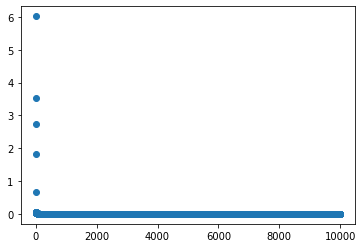

In [ ]:
data = get_iris_X_y()
w_np, loss_np = LR_SGD(data[0], data[1], 10000)
x_plot = np.linspace(0, len(loss_np), num=len(loss_np), endpoint=False)
plt.scatter(x_plot, loss_np)
print(w_np)

### Q3 `pytorch` implementation -- **no NN module** (*20 points*)

In [ ]:
!pip3 install torch

import torch
from torch.autograd import Variable

In [ ]:
def loss_ll(y_pred, y_true):
  return -torch.sum(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))


def LR_torch_no_nn(X, y):
  X_train, X_val, y_train, y_val = data_split(X, y, test_size=0.1, random_state=0)
  X_train_t = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
  y_train_t = Variable(torch.from_numpy(y_train).float())
  X_val_t = torch.from_numpy(X_val).float()
  y_val_t = torch.from_numpy(y_val).float()

  epochs = 100000
  alpha = 0.0005
  w = Variable(torch.ones(len(X_train[0]), 1), requires_grad=True)
  val_losses = np.array([])
  loss_func = loss_ll

  for i in range(epochs):
    preds = torch.sigmoid(X_train_t @ w)
    loss = loss_ll(preds, y_train_t)
    loss.backward()

    with torch.no_grad():
      w -= w.grad * alpha
      w.grad.zero_()
    
    val_loss_np = loss_func(torch.sigmoid(X_val_t @ w), y_val_t).detach().numpy()
    val_losses = np.append(val_losses, [val_loss_np])
    
  return w, val_losses

tensor([[-4.3243],
        [ 8.6795]], requires_grad=True)


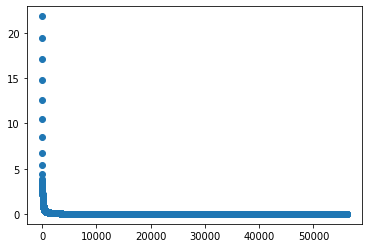

In [ ]:
w_torch_no_nn, l_torch_no_nn = LR_torch_no_nn(data[0], data[1])
print(w_torch_no_nn)
x_plot = np.linspace(0, len(l_torch_no_nn), num=len(l_torch_no_nn), endpoint=False)
plt.scatter(x_plot, l_torch_no_nn)

### Q4 `pytorch` implementation -- **with the NN module** (*10 points*)

In [ ]:
import torch.nn as nn

In [ ]:
class IrisLogistic(nn.Module):

  def __init__(self, d):
    super(IrisLogistic, self).__init__()
    self.linear = nn.Linear(d, 1, bias=False)

  def forward(self, X):
    return self.linear(X)


def LR_torch(X, y):
  X_train, X_val, y_train, y_val = data_split(X, y, test_size=0.1, random_state=0)
  X_train_t = torch.from_numpy(X_train).float()
  y_train_t = torch.from_numpy(y_train).float()
  X_val_t = torch.from_numpy(X_val).float()
  y_val_t = torch.from_numpy(y_val).float()


  epochs = 100000
  alpha = 0.1
  n, _ = X_train.shape
  bs = 10

  model = IrisLogistic(d=len(X_train[0]))
  loss_func = nn.BCEWithLogitsLoss()
  val_losses = np.array([])

  for epoch in range(epochs):
    pred = model(X_train_t)
    loss = loss_func(pred, y_train_t)
    loss.backward()

    with torch.no_grad():
      for w in model.parameters():
        w -= w.grad * alpha
        w.grad.zero_()

    val_loss_np = loss_func(model(X_val_t), y_val_t).detach().numpy()
    val_losses = np.append(val_losses, [val_loss_np])

  return model, val_losses

[Parameter containing:
tensor([[-4.8790,  9.8162]], requires_grad=True)]


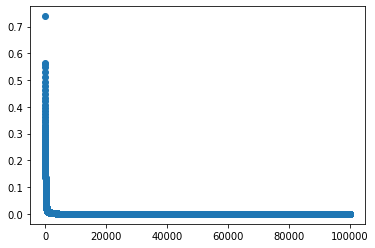

In [ ]:
m, l = LR_torch(data[0], data[1])
x_plot = np.linspace(0, len(l), num=len(l), endpoint=False)
plt.scatter(x_plot, l)
print(list(m.parameters()))